In [3]:
import main
import seaborn as sns

In [2]:
# создадим по 1000 точек каждым генератором
pointset = main.create_pointset(1000)
pointset.head()

,x,y,gen_number
0,-0.192946,-0.298685,Генератор 1
1,0.318007,-0.056567,Генератор 1
2,0.047583,0.070626,Генератор 1
3,0.011779,-0.078142,Генератор 1
4,0.194144,0.232915,Генератор 1


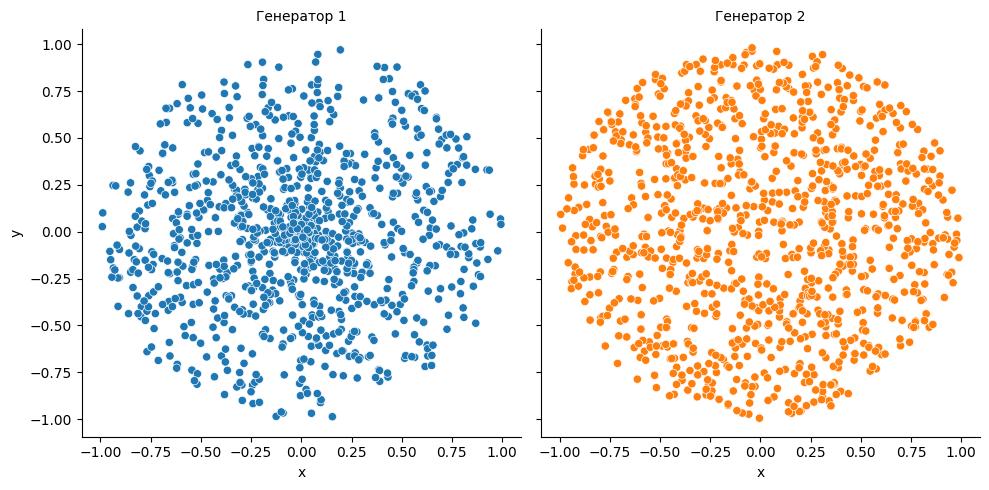

In [5]:
# нанесём точки на координатную плоскость
g1 = sns.relplot(
    data=pointset, x="x", y="y", 
    hue="gen_number", col="gen_number", legend=False
)
g1.set_titles("{col_name}")
g1.savefig('./figures/points.png')

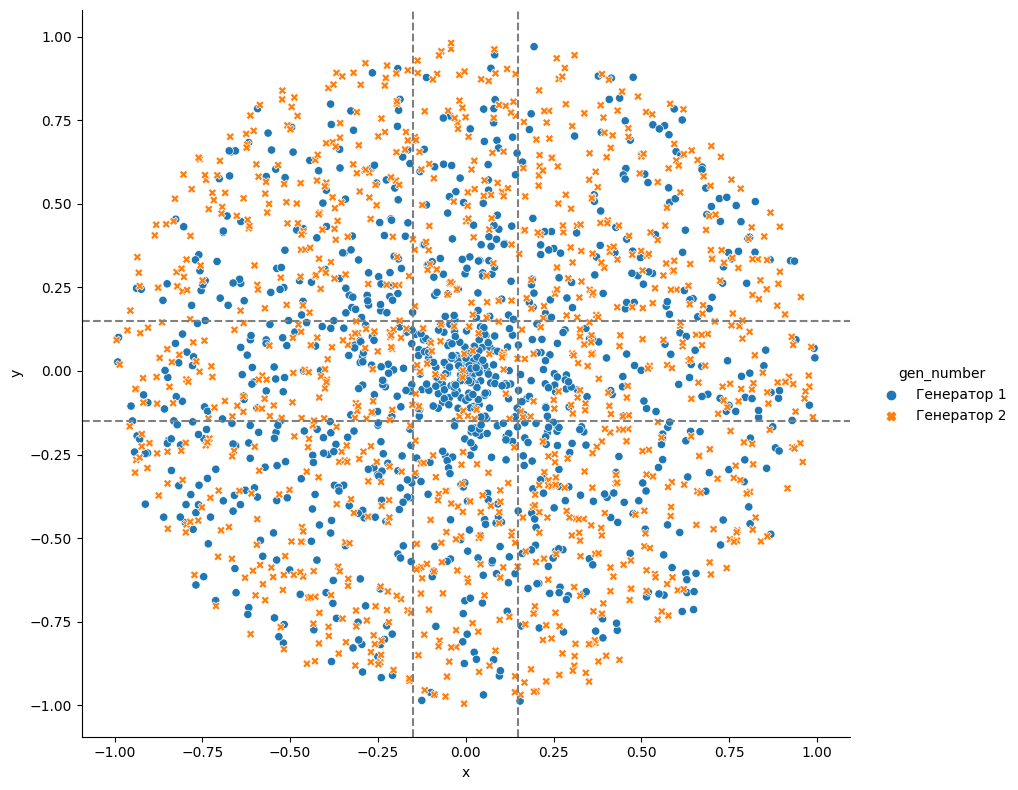

In [10]:
# в 1-ом наборе наблюдается скопление точек вокруг нуля  
# посмотрим поближе
lim = 0.15
g2 = sns.relplot(
        data=pointset, x="x", y="y",
        hue="gen_number", style="gen_number",
        height=8, aspect=1.1,
    )
g2.refline(x=lim, y=lim)
g2.refline(x=-lim, y=-lim)
g2.savefig('./figures/distribution.png')

In [11]:
# наибольшее скопление точек 1-го набора находится в области, ограниченной квадратом со стороной 0,3 и серединой в точке начала координат
# посчитаем количество точек, принадлежащих указанному квадрату, в каждом наборе
main.number_nzpoints(pointset)

,gen_number,size,near_zero
0,Генератор 1,1000,169
1,Генератор 2,1000,33


In [13]:
# проверим на большем количестве точек
main.find_threshold(500)

,count,mean,std,min,25%,50%,75%,max
Генератор 1,500.0,168.072,11.990929,137.0,160.75,168.0,176.0,208.0
Генератор 2,500.0,28.306,5.161943,13.0,25.00,28.0,32.0,43.0


In [ ]:
# после проверки можем сделать предположение:
# если в квадрате находится 100 и более точек - набор создан первым генератором
# напишем решение для проверяющей системы

def find_gen(line):
    near_zero = lambda x, y: abs(x) <= 0.15 and abs(y) <= 0.15
    cnt = 0
    for i in range(0, len(line) - 1, 2):
        x = float(line[i])
        y = float(line[i+1])
        if near_zero(x, y):
            cnt += 1
    print(1 if 100 <= cnt else 2)
